In [199]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [200]:
bookings = ['exactbooking', 'underbooking', 'overbooking', 'mixedbooking']

In [201]:
def draw_cumulative_reward_plots(booking):
    # load the data
    no_policy_df = pd.read_csv(f'{booking}/no_policy.csv')
    greedy_policy_df = pd.read_csv(f'{booking}/greedy_policy.csv')
    dqn_policy_df = pd.read_csv(f'{booking}/dqn_policy.csv')
    double_dqn_policy_df = pd.read_csv(f'{booking}/double_dqn_policy.csv')
    dueling_dqn_policy_df = pd.read_csv(f'{booking}/dueling_dqn_policy.csv')

    # get the first episode
    no_policy_ep = no_policy_df.query('episode == 0')
    greedy_policy_ep = greedy_policy_df.query('episode == 0')
    dqn_policy_ep = dqn_policy_df.query('episode == 0')
    double_dqn_policy_ep = double_dqn_policy_df.query('episode == 0')
    dueling_dqn_policy_ep = dueling_dqn_policy_df.query('episode == 0')

    # get the cumulative rewards
    no_policy_ep['cum_reward'] = -no_policy_ep.reward.cumsum()
    greedy_policy_ep['cum_reward'] = -greedy_policy_ep.reward.cumsum()
    dqn_policy_ep['cum_reward'] = -dqn_policy_ep.reward.cumsum()
    double_dqn_policy_ep['cum_reward'] = -double_dqn_policy_ep.reward.cumsum()
    dueling_dqn_policy_ep['cum_reward'] = -dueling_dqn_policy_ep.reward.cumsum()

    # draw the plot fot the cumulative rewards
    plt.figure(figsize=(5, 3))
    plt.plot(no_policy_ep['cum_reward'], label='No Policy')
    plt.plot(greedy_policy_ep['cum_reward'], label='Greedy Policy')
    plt.plot(dqn_policy_ep['cum_reward'], label='DQN Policy')
    plt.plot(double_dqn_policy_ep['cum_reward'], label='Double DQN Policy')
    plt.plot(dueling_dqn_policy_ep['cum_reward'], label='Dueling DQN Policy')
    
    # maximum
    max_cost = max(no_policy_ep['cum_reward'].tolist()+
             greedy_policy_ep['cum_reward'].tolist() +
             dqn_policy_ep['cum_reward'].tolist()+
             double_dqn_policy_ep['cum_reward'].tolist()+
             dueling_dqn_policy_ep['cum_reward'].tolist())
    
    plt.title(f'Costs for {booking}', fontweight="bold")
    plt.xlabel('time [s]')
    plt.ylabel('cumulative cost [$]')
    plt.xlim([0, len(no_policy_ep)])
    plt.ylim([0, max_cost*1.05])
    plt.grid(True)
    plt.minorticks_on()
    plt.legend(fontsize=8)

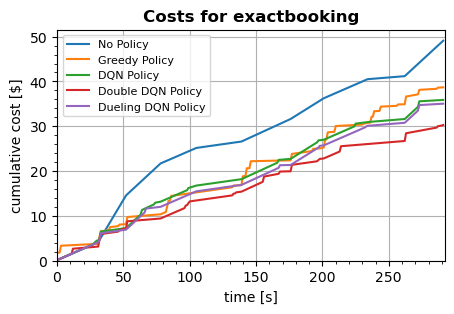

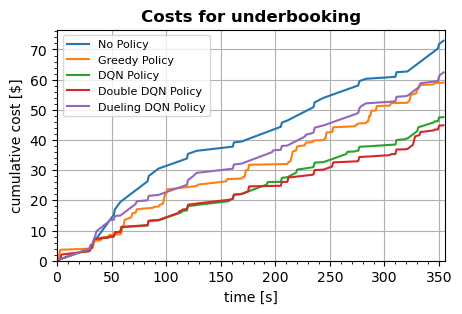

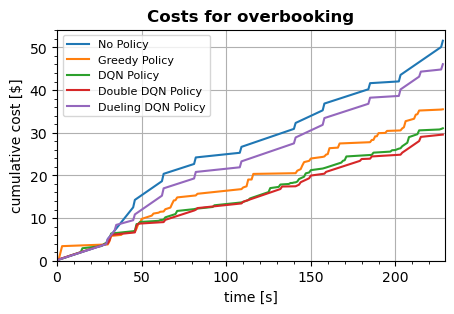

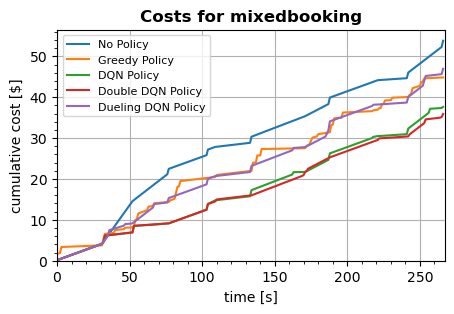

In [202]:
for booking in bookings:
    draw_cumulative_reward_plots(booking)

In [203]:
def draw_cumulative_reward_plots():
    
    data_list = []
    for booking in bookings:

        # load the data
        no_policy_df = pd.read_csv(f'{booking}/no_policy.csv')
        greedy_policy_df = pd.read_csv(f'{booking}/greedy_policy.csv')
        dqn_policy_df = pd.read_csv(f'{booking}/dqn_policy.csv')
        double_dqn_policy_df = pd.read_csv(f'{booking}/double_dqn_policy.csv')
        dueling_dqn_policy_df = pd.read_csv(f'{booking}/dueling_dqn_policy.csv')
        
        data_list.append([booking.replace('booking', '\nbooking'), 
                         -no_policy_df.groupby("episode").sum().reward.mean(), 
                         -greedy_policy_df.groupby("episode").sum().reward.mean(), 
                         -dqn_policy_df.groupby("episode").sum().reward.mean(), 
                         -double_dqn_policy_df.groupby("episode").sum().reward.mean(), 
                         -dueling_dqn_policy_df.groupby("episode").sum().reward.mean()])
    
    # create data
    df = pd.DataFrame(data_list,
                      columns=['Booking Type', 'No Policy', 'Greedy Policy', 
                               'DQN Policy', 'Double DQN Policy', 'Dueling DQN Policy'])

    # plot grouped bar chart
    df.plot(x='Booking Type',
            kind='bar',
            stacked=False, 
            figsize=(5, 3))
    plt.title('Average episode costs', fontweight="bold")
    plt.grid(True, axis='y')
    plt.grid(True, which='minor', axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    plt.ylabel('average episode cost [$]')
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=False)
    plt.legend(fontsize=8, ncol=3, bbox_to_anchor=(1.05, -0.3))

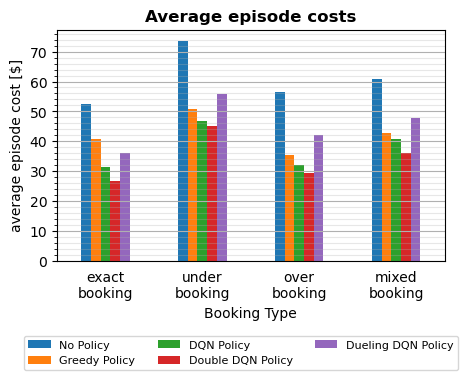

In [204]:
draw_cumulative_reward_plots()